In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("FINAL_ARXIV_2025_copy.csv")

In [3]:
all_words = []

for paper in data['abstract']:
    all_words.extend(paper.split())

for paper in data['title']:
    all_words.extend(paper.split())

word_counts = pd.Series(all_words).value_counts()
word_counts = word_counts[word_counts > 1]

print(word_counts)

the             252597
of              159212
and             117754
a                78529
to               71316
                 ...  
change:              2
Halting              2
Wang,                2
Inclinations         2
Calibrations         2
Name: count, Length: 71718, dtype: int64


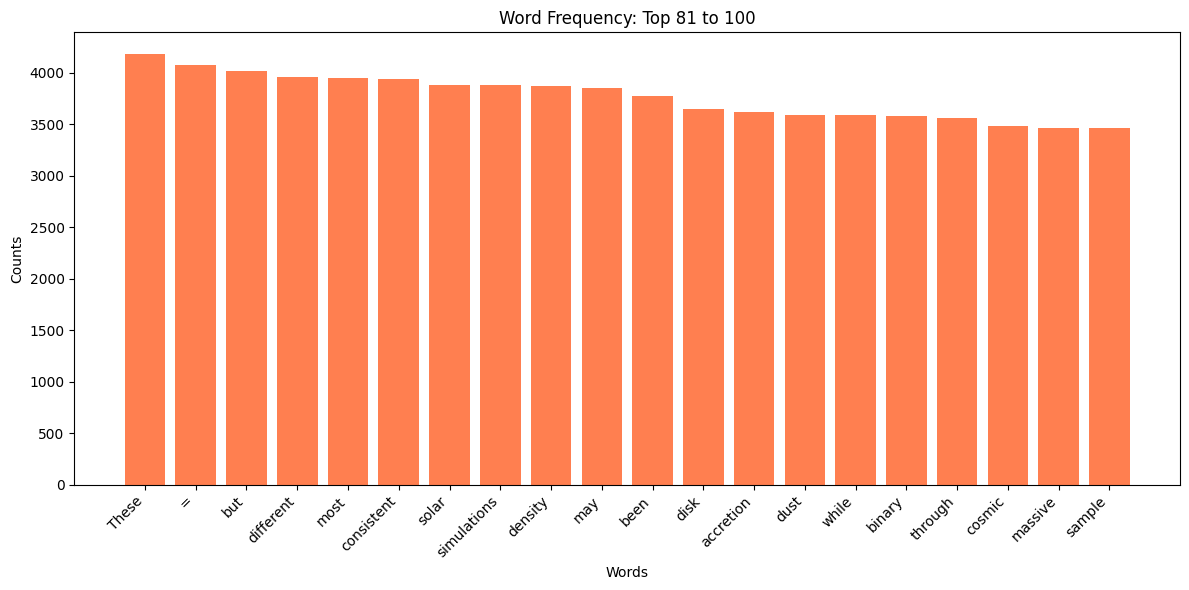

In [38]:
# Range of words to plot (e.g., 0 to 20 for top 20, or 40 to 60)
RANK_START = 80
RANK_END = 100

# Plotting word distribution
plt.figure(figsize=(12, 6))
subset = word_counts[RANK_START:RANK_END]
plt.bar(subset.index, subset.values, color='coral')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title(f'Word Frequency: Top {RANK_START+1} to {RANK_END}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [43]:
# Search for phrases in arXiv abstracts
search_phrases = ["machine learning", "high z", "high redshift", "high-z", "low z", 
"low redshift", "low-z", "spiral galaxy", "elliptical galaxy", 
"lenticular galaxy", "irregular galaxy" , "dwarf galaxy", "ellipticals", "spirals",
"lenticuars", "supernova", "supernovae", "SNIa", "Supernova Ia", "supernova Ia",
"LRD", "Little Red Dots", "Accretion", "Black Holes", "GW", "Gravitational Waves", 
"GRB", "GRBs", 'Gamma-Ray Burst', 'gamma-ray burst', 'Gamma Ray Burst', 'gamma ray burst',
"FRB", "Fast Radio Burst", "fast radio burst", "Fast Radio Bursts", "fast radio bursts",
"transients", "lensing", "dark matter", "dark energy", "axions", "WIMPS", "warm dark matter", "cold dark matter",
"White Dwarf", "X-ray Binary", "X-ray binaries", "XRB", "WR", "Wolf-Rayet",
"gamma", "gamma-ray", "x-ray", "uv", "ultraviolet", "optical", "infrared", "microwave", "radio",
"early universe", "early-universe", "cosmic noon",
"cmb", "cosmic microwave background",
"λ CDM", "Lambda CDM"]

count_phrases = []

for phrase in search_phrases:
    count_phrases.append(data['abstract'].str.contains(phrase, case=False).sum())

phrase_counts = dict(zip(search_phrases, count_phrases))

# Grouping terms that are variations of the same phrase
same_terms = {
    "high z": ["high z", "high redshift", "high-z"],
    "low z": ["low z", "low redshift", "low-z"],
    "spiral galaxy": ["spiral galaxy", "spirals"],
    "elliptical galaxy": ["elliptical galaxy", "ellipticals"],
    "lenticular galaxy": ["lenticular galaxy", "lenticuars"],
    "supernova": ["supernova", "supernovae"],
    "supernova Ia": ["supernova Ia", "SNIa"],
    "LRD": ["LRD", "Little Red Dots"],
    "black holes": ["Black Holes", "black holes"],
    "GW": ["GW", "Gravitational Waves"],
    "GRB": ["GRB", "GRBs", 'Gamma-Ray Burst', 'gamma-ray burst', 'Gamma Ray Burst', 'gamma ray burst'],
    "FRB": ["FRB", "Fast Radio Burst", "fast radio burst", "Fast Radio Bursts", "fast radio bursts"],
    "axions": ["axions", "cold dark matter"],
    "WIMPS": ["WIMPS", "warm dark matter"],
    "XRB": ["XRB", "X-ray Binary", "X-ray binaries"],
    "WR stars": ["WR", "Wolf-Rayet"],
    "gamma": ["gamma", "gamma-ray"],
    "uv": ["uv", "ultraviolet"],
    "infrared": ["infrared"],
    "early universe": ["early universe", "early-universe"],
    "cmb": ["cmb", "cosmic microwave background"],
    "λ CDM": ["λ CDM", "Lambda CDM"]

}

consolidated_counts = {}
accounted_for = set()

for main_phrase, aliases in same_terms.items():
    total = 0
    for alias in aliases:
        total += phrase_counts.get(alias, 0)
        accounted_for.add(alias)
    consolidated_counts[main_phrase] = total

for phrase, count in phrase_counts.items():
    if phrase not in accounted_for:
        consolidated_counts[phrase] = count

print(consolidated_counts)


{'high z': 462, 'low z': 185, 'spiral galaxy': 181, 'elliptical galaxy': 57, 'lenticular galaxy': 5, 'supernova': 2371, 'supernova Ia': 63, 'LRD': 234, 'black holes': 1041, 'GW': 964, 'GRB': 1370, 'FRB': 1086, 'axions': 205, 'WIMPS': 52, 'XRB': 427, 'WR stars': 303, 'gamma': 2335, 'uv': 1844, 'infrared': 1500, 'early universe': 446, 'cmb': 1145, 'λ CDM': 8, 'machine learning': 483, 'irregular galaxy': 6, 'dwarf galaxy': 187, 'Supernova Ia': 2, 'Accretion': 1935, 'transients': 403, 'lensing': 853, 'dark matter': 1312, 'dark energy': 811, 'White Dwarf': 492, 'x-ray': 2003, 'optical': 2494, 'microwave': 556, 'radio': 2073, 'cosmic noon': 107}


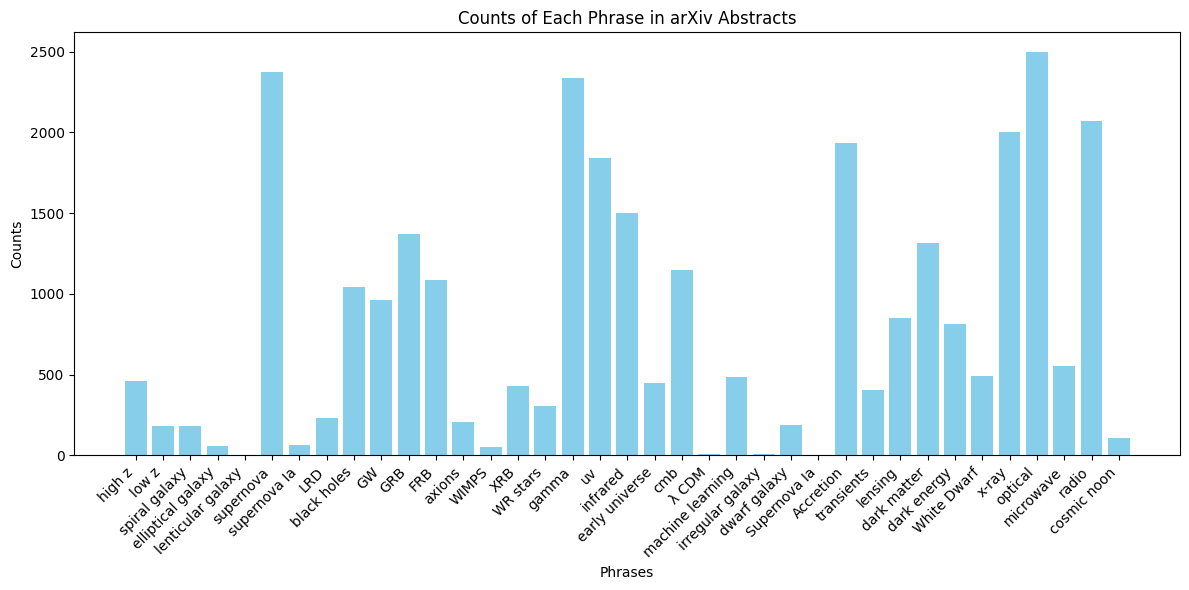

In [44]:
# Bar plot of phrase counts
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(consolidated_counts.keys(), consolidated_counts.values(), color='skyblue')
plt.xlabel('Phrases')
plt.ylabel('Counts')
plt.title('Counts of Each Phrase in arXiv Abstracts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


TypeError: 'numpy.ndarray' object is not callable

<Figure size 1200x600 with 0 Axes>